In [174]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
import quandl
apple = quandl.get("EOD/AAPL", authtoken="mUzt6A6xTvmpphnUPGWq", start_date = '1990-01-01')
microsoft = quandl.get("EOD/MSFT", authtoken="mUzt6A6xTvmpphnUPGWq", start_date = '1990-01-01')


In [254]:
apple.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
1990-01-02,35.25,37.50,35.00,37.25,1635700.0,0.0,1.0,1.034248,1.100264,1.026913,1.092929,45799600.0
1990-01-03,38.00,38.00,37.50,37.50,1857100.0,0.0,1.0,1.114934,1.114934,1.100264,1.100264,51998800.0
1990-01-04,38.25,38.75,37.25,37.63,1977800.0,0.0,1.0,1.122269,1.136939,1.092929,1.104078,55378400.0
1990-01-05,37.75,38.25,37.00,37.75,1101000.0,0.0,1.0,1.107599,1.122269,1.085594,1.107599,30828000.0
1990-01-08,37.50,38.00,37.00,38.00,906900.0,0.0,1.0,1.100264,1.114934,1.085594,1.114934,25393200.0


In [255]:
stocks = pd.DataFrame({"AAPL": apple["Adj_Close"],
                      "MSFT": microsoft["Adj_Close"]})
stocks.head()

,AAPL,MSFT
Date,,
1990-01-02,1.092929,0.403284
1990-01-03,1.100264,0.405556
1990-01-04,1.104078,0.417462
1990-01-05,1.107599,0.407238
1990-01-08,1.114934,0.413508


In [256]:
#splitting into train and validation
train = stocks[6805:7306]
valid = stocks[7306:]

In [257]:
train.head()

,AAPL,MSFT
Date,,
2017-01-03,112.133559,60.175508
2017-01-04,112.008054,59.906267
2017-01-05,112.577652,59.906267
2017-01-06,113.832698,60.425519
2017-01-09,114.875352,60.233203


In [258]:
appletrain = train.drop(train.columns[[1]], axis=1)

In [259]:
appletrain.head()

,AAPL
Date,
2017-01-03,112.133559
2017-01-04,112.008054
2017-01-05,112.577652
2017-01-06,113.832698
2017-01-09,114.875352


In [260]:
applevalid = valid.drop(valid.columns[[1]], axis=1)

In [261]:
applevalid.head()

,AAPL
Date,
2018-12-31,157.067158
2019-01-02,157.246390
2019-01-03,141.583487
2019-01-04,147.627595
2019-01-07,147.299003


# Auto - ARIMA

In [262]:
from pmdarima import auto_arima

In [263]:
training = appletrain['AAPL']
validation = applevalid['AAPL']

In [285]:
#Build Model
ARIMAmodel = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=False,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
ARIMAmodel.fit(training)

Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=2394.852, BIC=2403.282, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2395.929, BIC=2408.573, Fit time=0.066 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2395.809, BIC=2408.453, Fit time=0.047 seconds
Total fit time: 0.264 seconds


C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 0),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [286]:
#Predict
forecast = ARIMAmodel.predict(n_periods=38)


C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

In [288]:
forecast

array([155.65045889, 155.73731897, 155.82417905, 155.91103913,
       155.99789921, 156.08475929, 156.17161937, 156.25847945,
       156.34533953, 156.43219961, 156.51905969, 156.60591977,
       156.69277985, 156.77963993, 156.86650001, 156.95336009,
       157.04022017, 157.12708025, 157.21394033, 157.30080041,
       157.38766049, 157.47452057, 157.56138065, 157.64824073,
       157.73510081, 157.82196089, 157.90882097, 157.99568105,
       158.08254113, 158.16940121, 158.25626129, 158.34312137,
       158.42998145, 158.51684153, 158.60370161, 158.69056169,
       158.77742177, 158.86428185])

In [289]:
future = pd.DataFrame(forecast[-5:])

In [290]:
future

,0
0,158.516842
1,158.603702
2,158.690562
3,158.777422
4,158.864282


In [291]:
forecast = forecast[:-5]

In [292]:
forecast

array([155.65045889, 155.73731897, 155.82417905, 155.91103913,
       155.99789921, 156.08475929, 156.17161937, 156.25847945,
       156.34533953, 156.43219961, 156.51905969, 156.60591977,
       156.69277985, 156.77963993, 156.86650001, 156.95336009,
       157.04022017, 157.12708025, 157.21394033, 157.30080041,
       157.38766049, 157.47452057, 157.56138065, 157.64824073,
       157.73510081, 157.82196089, 157.90882097, 157.99568105,
       158.08254113, 158.16940121, 158.25626129, 158.34312137,
       158.42998145])

In [293]:
forecast = pd.DataFrame(forecast,index = msftvalid.index,columns=['Prediction'])

In [294]:
#RMSE
rms=np.sqrt(np.mean(np.power((np.array(applevalid['AAPL'])-np.array(forecast['Prediction'])),2)))
rms

8.630946572400706

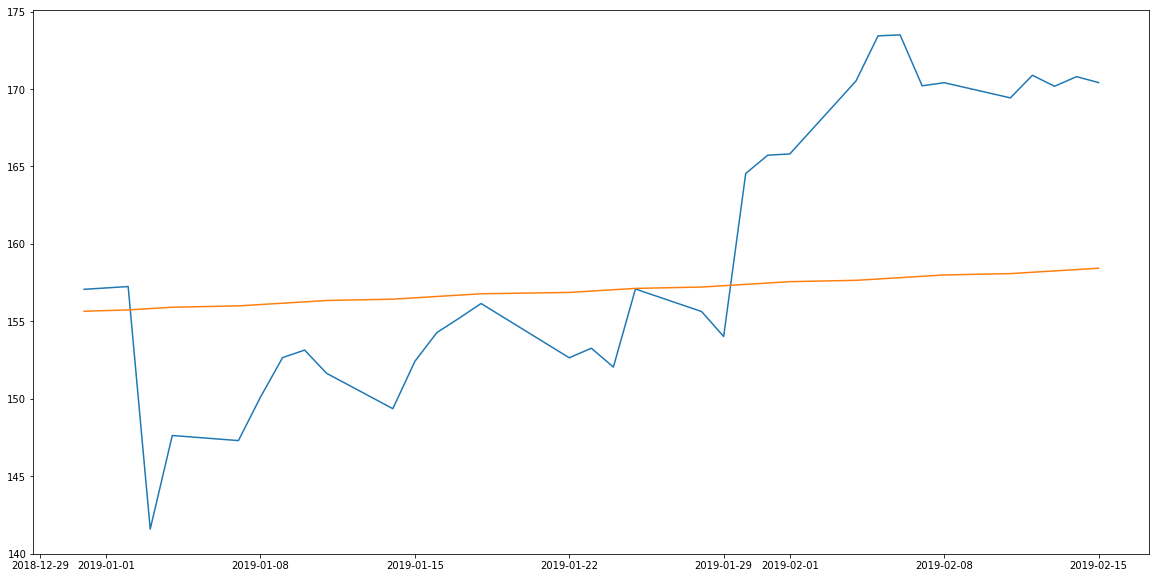

In [295]:
#plot
plt.plot(applevalid['AAPL'])
plt.plot(forecast['Prediction'])

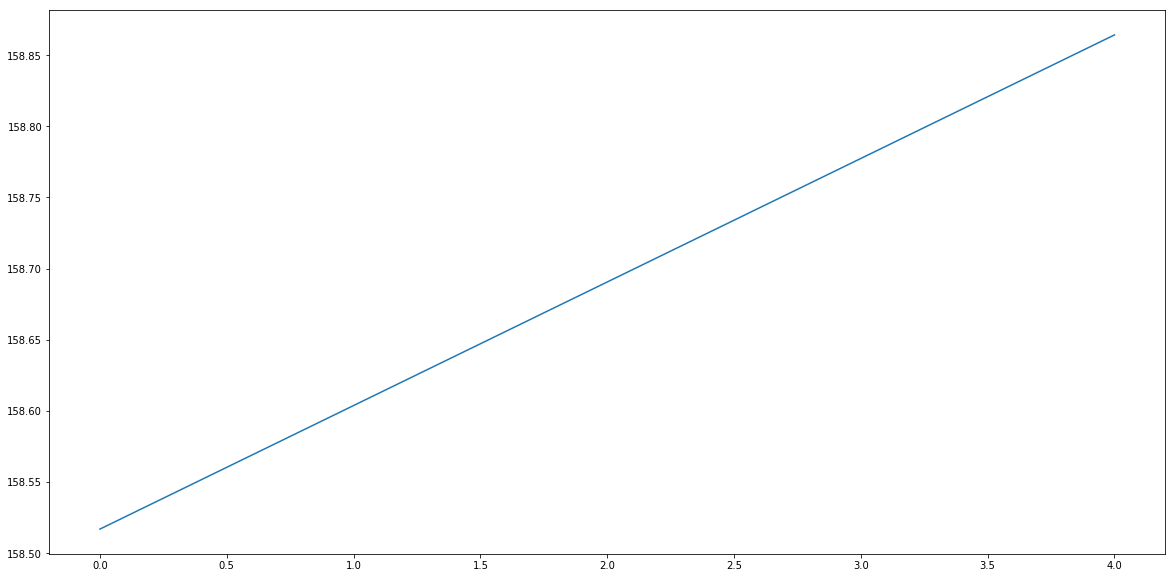

In [240]:
plt.plot(future)

In [241]:
msfttrain = train.drop(train.columns[[0]], axis=1)

In [242]:
msfttrain.head()

,MSFT
Date,
2017-01-03,60.175508
2017-01-04,59.906267
2017-01-05,59.906267
2017-01-06,60.425519
2017-01-09,60.233203


In [243]:
msftvalid = valid.drop(valid.columns[[0]], axis=1)

In [244]:
msftvalid.head()

,MSFT
Date,
2018-12-31,101.57
2019-01-02,101.12
2019-01-03,97.40
2019-01-04,101.93
2019-01-07,102.06


In [245]:
training = msfttrain['MSFT']
validation = msftvalid['MSFT']

In [246]:
#Building Model
ARIMAmodel = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=False,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
ARIMAmodel.fit(training)

Fit ARIMA: order=(1, 1, 1); AIC=1696.450, BIC=1713.309, Fit time=0.424 seconds
Fit ARIMA: order=(0, 1, 0); AIC=1712.198, BIC=1720.628, Fit time=0.009 seconds
Fit ARIMA: order=(1, 1, 0); AIC=1702.791, BIC=1715.435, Fit time=0.052 seconds
Fit ARIMA: order=(0, 1, 1); AIC=1699.288, BIC=1711.931, Fit time=0.050 seconds


C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

Fit ARIMA: order=(2, 1, 1); AIC=1696.578, BIC=1717.651, Fit time=0.290 seconds
Fit ARIMA: order=(1, 1, 2); AIC=1696.298, BIC=1717.371, Fit time=0.400 seconds
Fit ARIMA: order=(2, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 2); AIC=1695.881, BIC=1712.740, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 3); AIC=1697.124, BIC=1718.197, Fit time=0.260 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.826 seconds


ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=None, solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [247]:
#Predict
forecast = ARIMAmodel.predict(n_periods=38)


C:\Users\denia\Anaconda2\envs\pmdenv\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


In [248]:
future = pd.DataFrame(forecast[-5:])

In [249]:
forecast = forecast[:-5]

In [250]:
forecast = pd.DataFrame(forecast,index = msftvalid.index,columns=['Prediction'])

In [251]:
#RMSE
rms=np.sqrt(np.mean(np.power((np.array(msftvalid['MSFT'])-np.array(forecast['Prediction'])),2)))
rms

3.5192129630703923

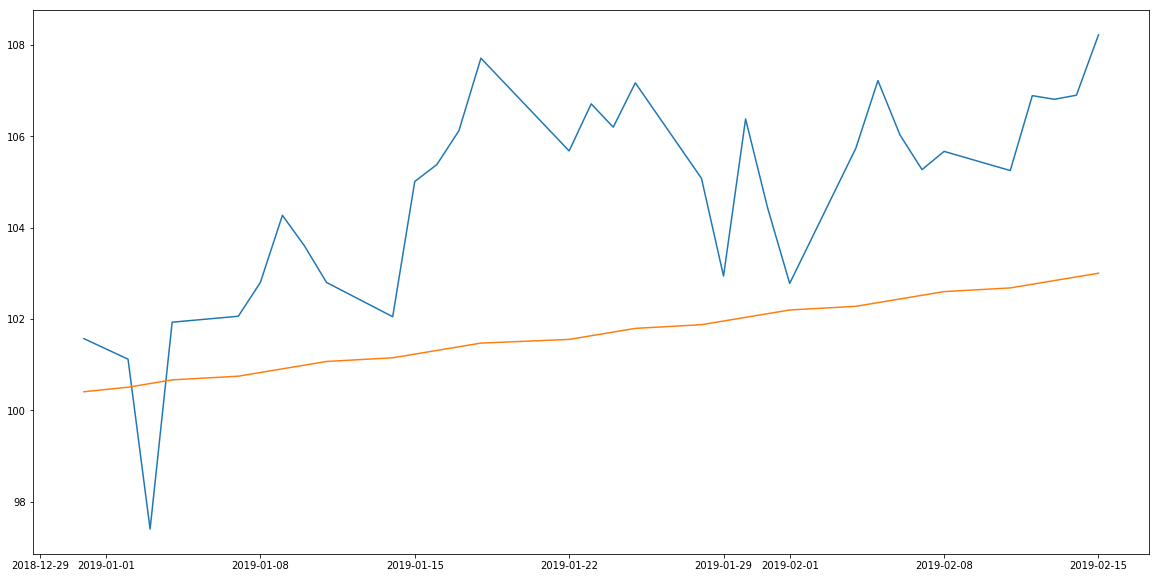

In [252]:
#plot
plt.plot(valid['MSFT'])
plt.plot(forecast['Prediction'])

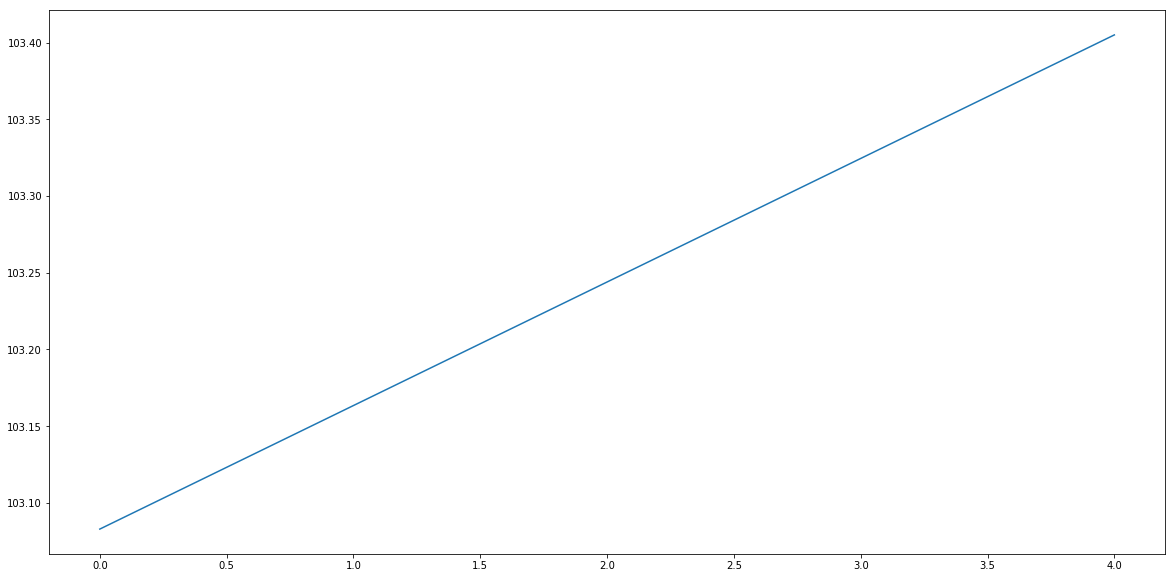

In [253]:
plt.plot(future)